# Notebook for the decision tree task

In [19]:
# imports

import matplotlib.pyplot as plt
import numpy as np

# Import Pandas and NumPy functionality for editing data
import pandas as pd
import seaborn as sns

# Importing IPython display for visualizing intermediate results in the notebook
from IPython.display import display

# decision tree
from sklearn import tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

Load the train and test data sets

In [20]:
train_dataset_oh = pd.read_csv('train_insurance_one_hot.csv')
x_train = train_dataset_oh.drop(columns=['id','charges','chargeGroup'], inplace=False)
y_train = train_dataset_oh[["chargeGroup"]]

test_dataset_oh = pd.read_csv('test_insurance_one_hot.csv')
x_test = test_dataset_oh.drop(columns=['id','charges','chargeGroup'], inplace=False)
y_test = test_dataset_oh[["chargeGroup"]]

## a)

In [21]:
y_true = test_dataset_oh['chargeGroup']
wishful_thinking = ['low']*len(y_true)

accuracy = accuracy_score(y_true,wishful_thinking)
print(accuracy)

0.48880597014925375


## b)

In [22]:
mode_value = train_dataset_oh['chargeGroup'].mode()
mode_based = [mode_value]*len(y_true)
accuracy = accuracy_score(y_true,mode_based)

print(accuracy)

0.3880597014925373


## c)

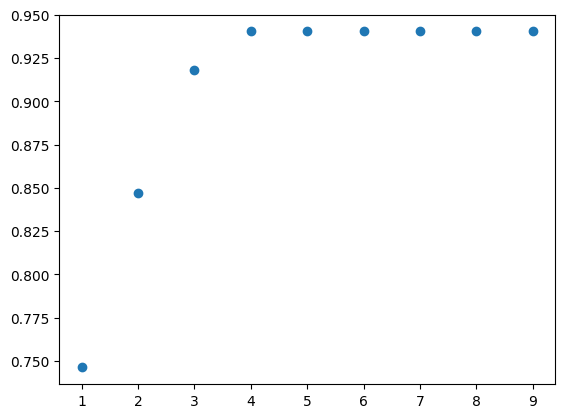

In [23]:
depths = []
accuracies = []

for i in range(1,10):
    model = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=6, random_state=42, max_depth=i)
    model.fit(x_train,y_train)
    prediction = model.predict(x_test)
    accuracy = accuracy_score(y_test, prediction)
    depths.append(i)
    accuracies.append(accuracy)

plt.scatter(depths,accuracies)


## d)

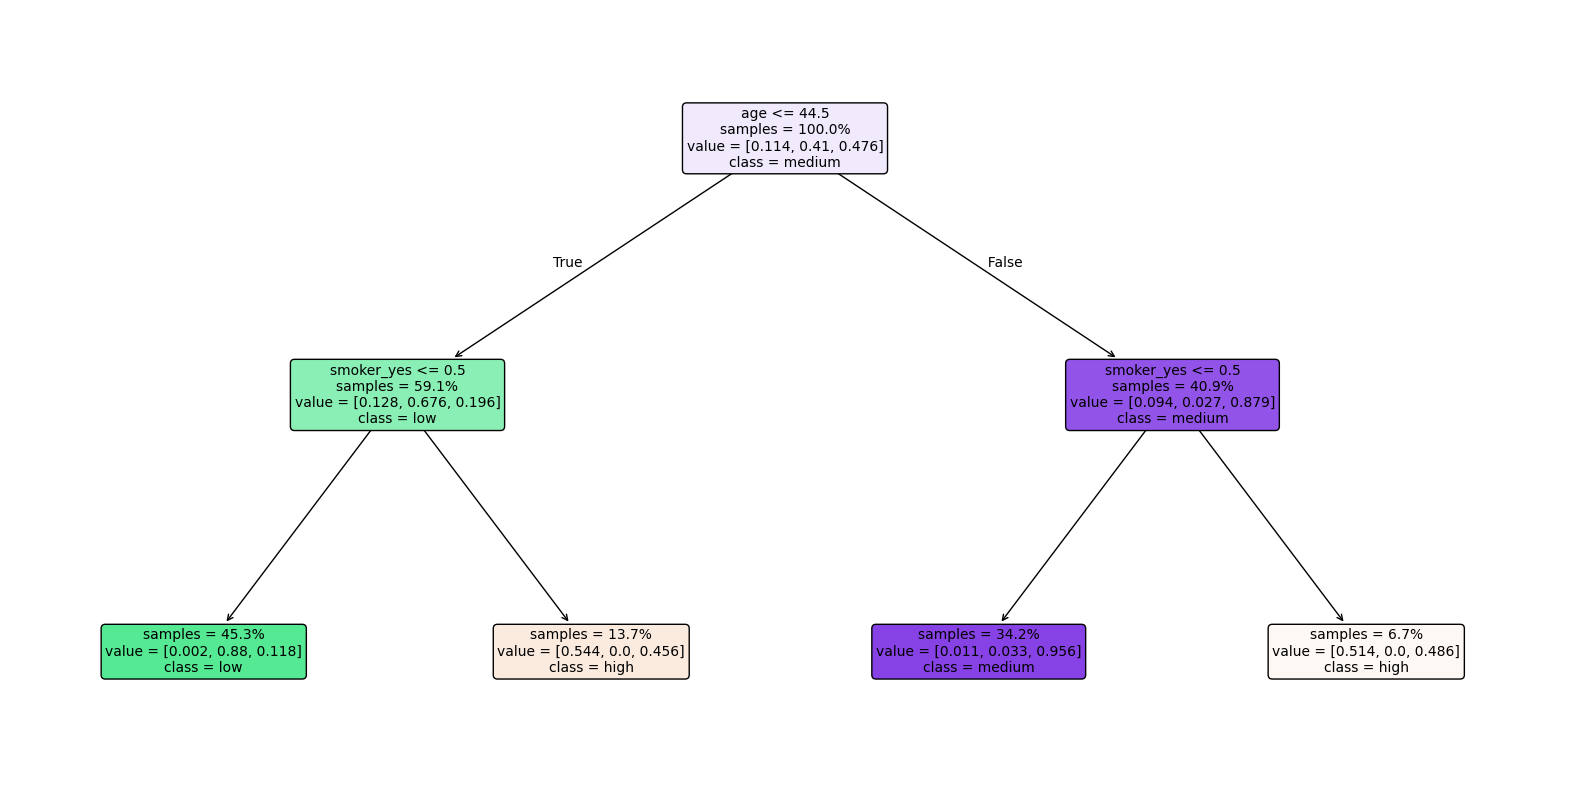

In [24]:
model = tree.DecisionTreeClassifier(criterion='gini', min_samples_leaf=6, random_state=42, max_depth=2)
model.fit(x_train,y_train)
prediction = model.predict(x_test)

fig = plt.figure(figsize=(20,10)) 
plot_tree(model,
    feature_names=x_train.columns,
    class_names=[str(c) for c in model.classes_],  
    filled=True,
    impurity=False,
    rounded=True,
    fontsize=10,
    proportion=True)
plt.show()